In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [34]:
df = pd.read_excel('GSS.xlsx')

In [35]:
df.head(10)

,year,id_,wrkstat,hrs2,spwrksta,childs,family16,health,ballot
0,1972,1,Working full time,.i: Inapplicable,.i: Inapplicable,0,FATHER,Good,.i: Inapplicable
1,1972,2,Retired,.i: Inapplicable,KEEPING HOUSE,5,M AND F RELATIVES,Fair,.i: Inapplicable
2,1972,3,Working part time,.i: Inapplicable,WORKING FULLTIME,4,MOTHER & FATHER,Excellent,.i: Inapplicable
3,1972,4,Working full time,.i: Inapplicable,WORKING FULLTIME,0,MOTHER & FATHER,Good,.i: Inapplicable
4,1972,5,Keeping house,.i: Inapplicable,TEMP NOT WORKING,2,MOTHER & FATHER,Good,.i: Inapplicable
5,1972,6,Working full time,.i: Inapplicable,.i: Inapplicable,0,MOTHER & FATHER,Good,.i: Inapplicable
6,1972,7,Working full time,.i: Inapplicable,.i: Inapplicable,2,MOTHER & FATHER,Excellent,.i: Inapplicable
7,1972,8,Working full time,.i: Inapplicable,.i: Inapplicable,0,MOTHER & FATHER,Good,.i: Inapplicable
8,1972,9,Working part time,.i: Inapplicable,.i: Inapplicable,2,M AND F RELATIVES,Excellent,.i: Inapplicable
9,1972,10,Working full time,.i: Inapplicable,WORKING FULLTIME,4,MOTHER & FATHER,Fair,.i: Inapplicable


In [36]:
# Drop rows with missing health data (since it's our primary focus)
df = df.dropna(subset=['health'])

In [37]:
# Display unique values in the 'health' column
print(df['health'].unique())

['Good' 'Fair' 'Excellent' 'Poor' '.n:  No answer'
 '.d:  Do not Know/Cannot Choose' '.i:  Inapplicable'
 '.s:  Skipped on Web']


In [38]:
# Define a mapping for the health responses
health_mapping = {
    '.n:  No answer': 'No Response',
    '.d:  Do not Know/Cannot Choose': 'No Response',
    '.i:  Inapplicable': 'No Response',
    '.s:  Skipped on Web': 'No Response'
}

# Replace non-response categories with 'No Response'
df['health'] = df['health'].replace(health_mapping)
df['health'] = df['health'].astype('category')

# Check cleaned unique values
print(df['health'].unique())

['Good', 'Fair', 'Excellent', 'Poor', 'No Response']
Categories (5, object): ['Excellent', 'Fair', 'Good', 'No Response', 'Poor']


In [39]:
# Convert categorical variables to appropriate types
df['wrkstat'] = df['wrkstat'].astype('category')
df['spwrksta'] = df['spwrksta'].astype('category')
df['family16'] = df['family16'].astype('category')
df['health'] = df['health'].astype('category')

In [40]:
# Replace non-numeric values with NaN
df['childs'] = pd.to_numeric(df['childs'], errors='coerce')
df['hrs2'] = pd.to_numeric(df['hrs2'], errors='coerce')

In [41]:
# Check if conversion worked
print(df[['childs', 'hrs2']].dtypes)

childs    float64
hrs2      float64
dtype: object


In [42]:
# Summary statistics for numeric variables
numeric_summary = df[['year', 'childs', 'hrs2']].describe()
print(numeric_summary)

               year        childs         hrs2
count  72390.000000  71128.000000  1397.000000
mean    1997.715541      1.830925    39.063708
std       15.109995      1.615946    13.303363
min     1972.000000      0.000000     0.000000
25%     1985.000000      0.000000    35.000000
50%     1998.000000      2.000000    40.000000
75%     2010.000000      3.000000    45.000000
max     2022.000000      7.000000    84.000000


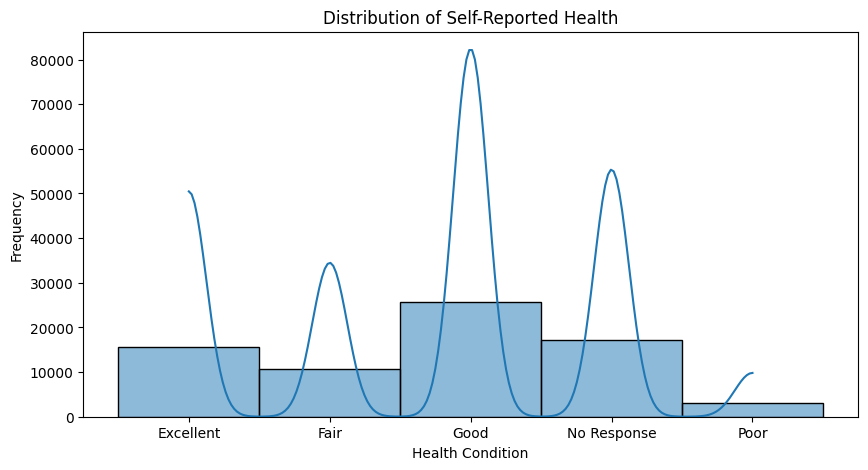

In [43]:
# Visualizations
plt.figure(figsize=(10,5))
sns.histplot(df['health'], bins=5, kde=True)
plt.title('Distribution of Self-Reported Health')
plt.xlabel('Health Condition')
plt.ylabel('Frequency')
plt.show()

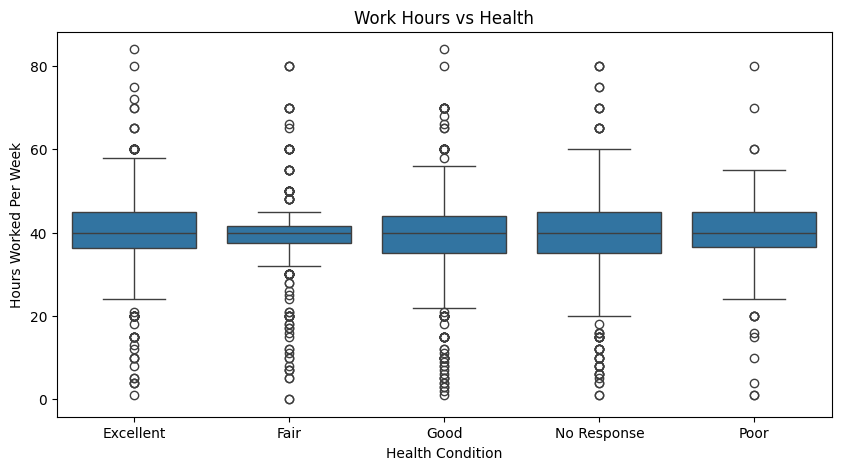

In [44]:
# Boxplot to examine work hours and health
plt.figure(figsize=(10,5))
sns.boxplot(x='health', y='hrs2', data=df)
plt.title('Work Hours vs Health')
plt.xlabel('Health Condition')
plt.ylabel('Hours Worked Per Week')
plt.show()

In [45]:
# Display unique values in the 'wrkstat' column
print(df['wrkstat'].unique())

['Working full time', 'Retired', 'Working part time', 'Keeping house', 'In school', ..., 'With a job, but not at work because of tempor..., 'Other', '.n:  No answer', '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose']
Length: 11
Categories (11, object): ['.d:  Do not Know/Cannot Choose', '.n:  No answer', '.s:  Skipped on Web', 'In school', ..., 'Unemployed, laid off, looking for work', 'With a job, but not at work because of tempor..., 'Working full time', 'Working part time']


In [52]:
# Clean the 'wrkstat' column by grouping non-response categories
df['wrkstat'] = df['wrkstat'].replace({
    '.n:  No answer': 'No Response',
    '.s:  Skipped on Web': 'No Response',
    '.d:  Do not Know/Cannot Choose': 'No Response',
    'With a job, but not at work because of temporary illness, vacation, strike': 'No Response',
    'Other': 'No Response'
})

df['wrkstat'] = df['wrkstat'].astype('category')

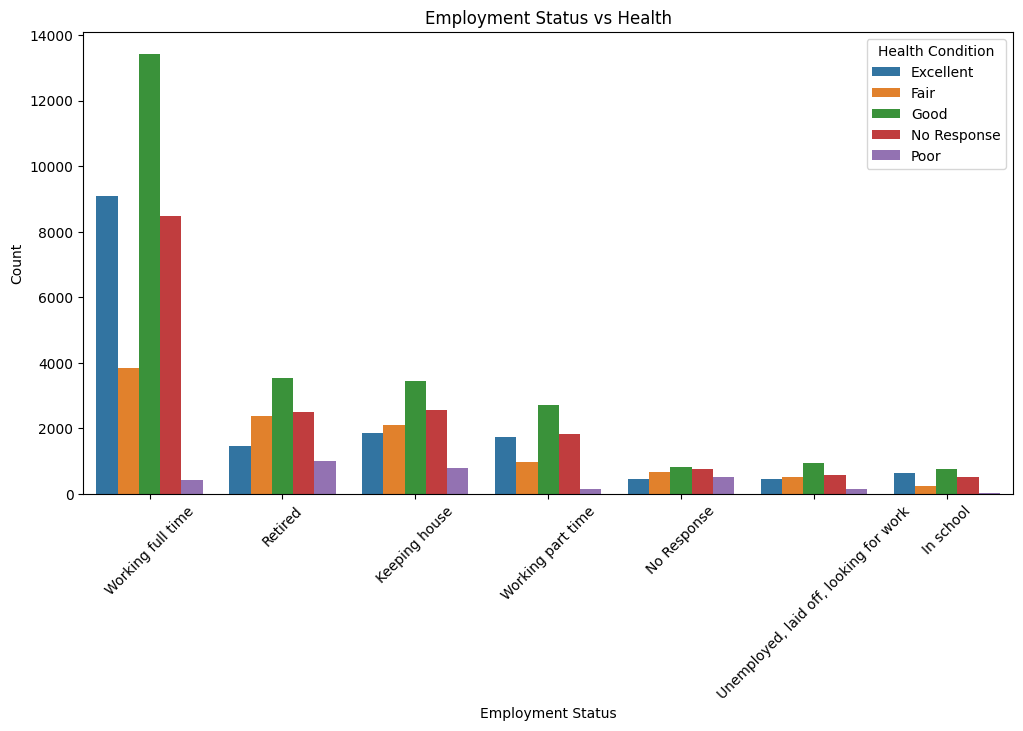

In [53]:
# Bar plot for employment status vs health
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='wrkstat', hue='health', order=df['wrkstat'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Employment Status vs Health')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Health Condition')
plt.show()

In [54]:
# Display unique values in the 'spwrksta' column
print(df['spwrksta'].unique())

['.i:  Inapplicable', 'KEEPING HOUSE', 'WORKING FULLTIME', 'TEMP NOT WORKING', 'WORKING PARTTIME', ..., 'SCHOOL', 'OTHER', '.n:  No answer', '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose']
Length: 12
Categories (12, object): ['.d:  Do not Know/Cannot Choose', '.i:  Inapplicable', '.n:  No answer', '.s:  Skipped on Web', ..., 'TEMP NOT WORKING', 'UNEMPL, LAID OFF', 'WORKING FULLTIME', 'WORKING PARTTIME']


In [55]:
# Clean the 'spwrksta' column by grouping non-response categories
df['spwrksta'] = df['spwrksta'].replace({
    '.n:  No answer': 'No Response',
    '.s:  Skipped on Web': 'No Response',
    '.d:  Do not Know/Cannot Choose': 'No Response',
    '.i:  Inapplicable': 'No Response'
})

df['spwrksta'] = df['spwrksta'].astype('category')

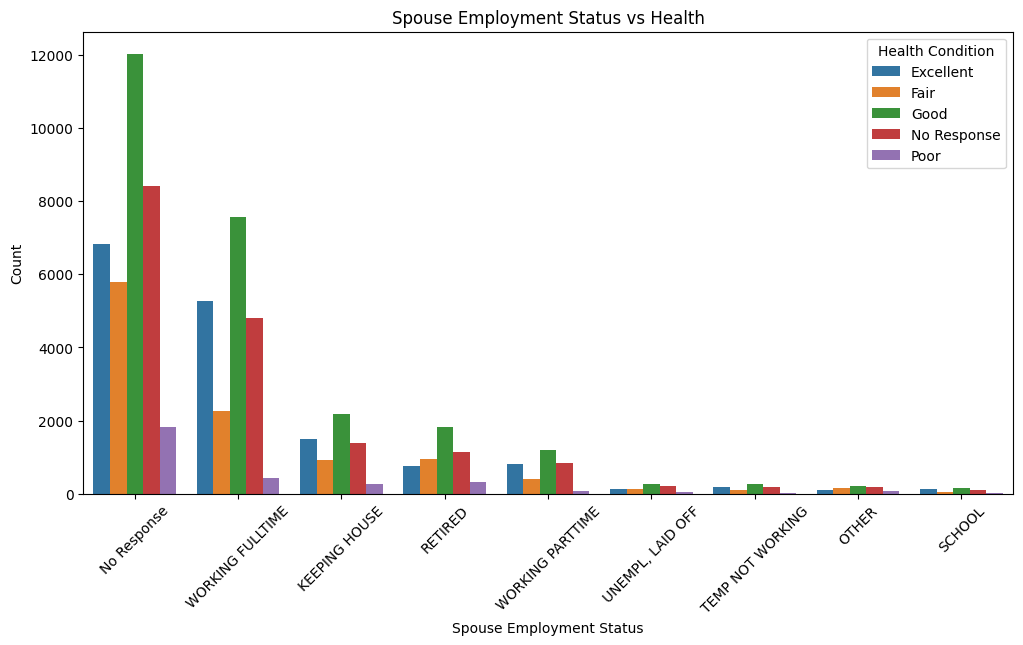

In [56]:
# Bar plot for spouse employment status vs health
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='spwrksta', hue='health', order=df['spwrksta'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Spouse Employment Status vs Health')
plt.xlabel('Spouse Employment Status')
plt.ylabel('Count')
plt.legend(title='Health Condition')
plt.show()

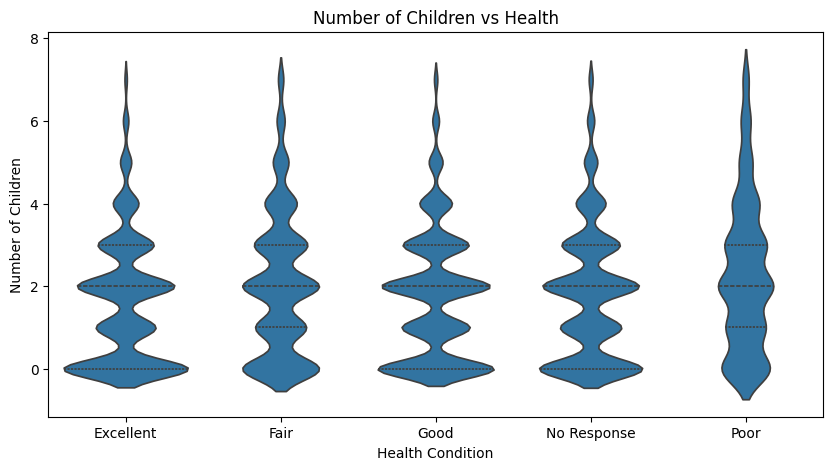

In [57]:
# Violin plot for number of children vs health
plt.figure(figsize=(10,5))
sns.violinplot(x='health', y='childs', data=df, inner='quartile')
plt.title('Number of Children vs Health')
plt.xlabel('Health Condition')
plt.ylabel('Number of Children')
plt.show()